In [20]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
# Load the data per book
book1_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book1.csv')
book2_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book2.csv')
book3_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book3.csv')
book4_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book4.csv')
book5_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/GOT/book5.csv')

# Make sure that Source < Target in lexicographical order
book1_df[["Source","Target"]].values.sort()
book2_df[["Source","Target"]].values.sort()
book3_df[["Source","Target"]].values.sort()
book4_df[["Source","Target"]].values.sort()
book5_df[["Source","Target"]].values.sort()

book1_df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


# Q1

## (a)

# nodes: 187
# edges: 684


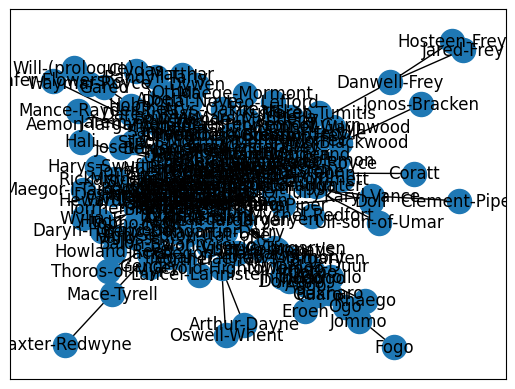

In [4]:
def make_graph(book_df: pd.DataFrame):
  """
  Make graph from single book_df
  Return: nx.Graph object
  """
  ## YOUR CODE STARTS HERE

  G_book = nx.Graph()

  for index, row in book_df.iterrows():
    G_book.add_edge(row["Source"], row["Target"], weight=row["weight"])

  nx.draw_networkx(G_book)
  return G_book

book1_G = make_graph(book1_df)

## Print number of nodes and egdes
## YOUR CODE STARTS HERE
print("# nodes:", len(book1_G.nodes()))
print("# edges:", len(book1_G.edges()))

## (b)

top 3 edges for book 2: [('Tyrion-Lannister', 'Joffrey-Baratheon', {'weight': 92}), ('Tyrion-Lannister', 'Cersei-Lannister', {'weight': 87}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 76})]
top 3 edges for book 3: [('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 95}), ('Jaime-Lannister', 'Brienne-of-Tarth', {'weight': 87}), ('Jon-Snow', 'Mance-Rayder', {'weight': 83})]
top 3 edges for book 4: [('Cersei-Lannister', 'Tommen-Baratheon', {'weight': 80}), ('Cersei-Lannister', 'Margaery-Tyrell', {'weight': 67}), ('Cersei-Lannister', 'Jaime-Lannister', {'weight': 49})]
top 3 edges for book 5: [('Daenerys-Targaryen', 'Hizdahr-zo-Loraq', {'weight': 96}), ('Theon-Greyjoy', 'Ramsay-Snow', {'weight': 87}), ('Daenerys-Targaryen', 'Barristan-Selmy', {'weight': 75})]


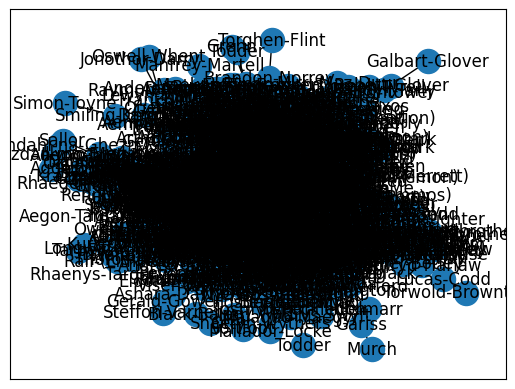

In [35]:
book2_G = make_graph(book2_df)
book3_G = make_graph(book3_df)
book4_G = make_graph(book4_df)
book5_G = make_graph(book5_df)

## YOUR CODE STARTS HERE
def top_edges(Graph, num_top=3):
  sorted_edges = sorted(Graph.edges(data=True), key=lambda x: x[2]['weight'],
                        reverse=True)
  return sorted_edges[:num_top]

top_edges_book2 = top_edges(book2_G)
top_edges_book3 = top_edges(book3_G)
top_edges_book4 = top_edges(book4_G)
top_edges_book5 = top_edges(book5_G)

print("top 3 edges for book 2:", top_edges_book2)
print("top 3 edges for book 3:", top_edges_book3)
print("top 3 edges for book 4:", top_edges_book4)
print("top 3 edges for book 5:", top_edges_book5)


## (c)

<ipython-input-11-ef0db76b4d30>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  allbook_df_grouped = allbook_df.groupby(['Source', 'Target']).sum().reset_index()


top 5 edges: [('Eddard-Stark', 'Robert-Baratheon', {'weight': 334}), ('Jon-Snow', 'Samwell-Tarly', {'weight': 228}), ('Joffrey-Baratheon', 'Sansa-Stark', {'weight': 222}), ('Joffrey-Baratheon', 'Tyrion-Lannister', {'weight': 219}), ('Cersei-Lannister', 'Tyrion-Lannister', {'weight': 209})]


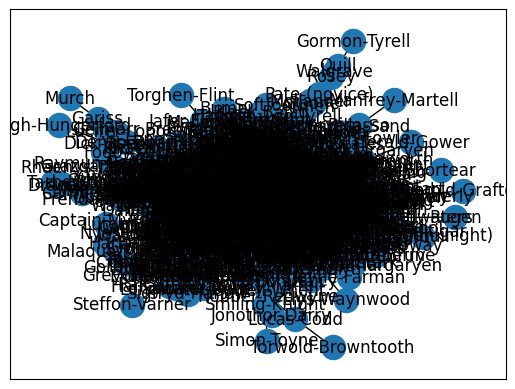

In [11]:
allbook_G = nx.Graph()

allbook_df=pd.concat([book1_df,book2_df,book3_df,book4_df,book5_df])

## YOUR CODE STARTS HERE
## Hint, df.groupby().sum().reset_index()
## Note that the dataframes are pre-sorted, thus there's no duplicate pairs of ( Source=A,Target=B ) and ( Source=B,Target=A )

allbook_df = pd.concat([book1_df, book2_df, book3_df, book4_df, book5_df])
allbook_df_grouped = allbook_df.groupby(['Source', 'Target']).sum().reset_index()
allbook_G = make_graph(allbook_df_grouped)
top_edges_allbooks = top_edges(allbook_G, num_top=5)
print("top 5 edges:", top_edges_allbooks)


# Q2

## (a)

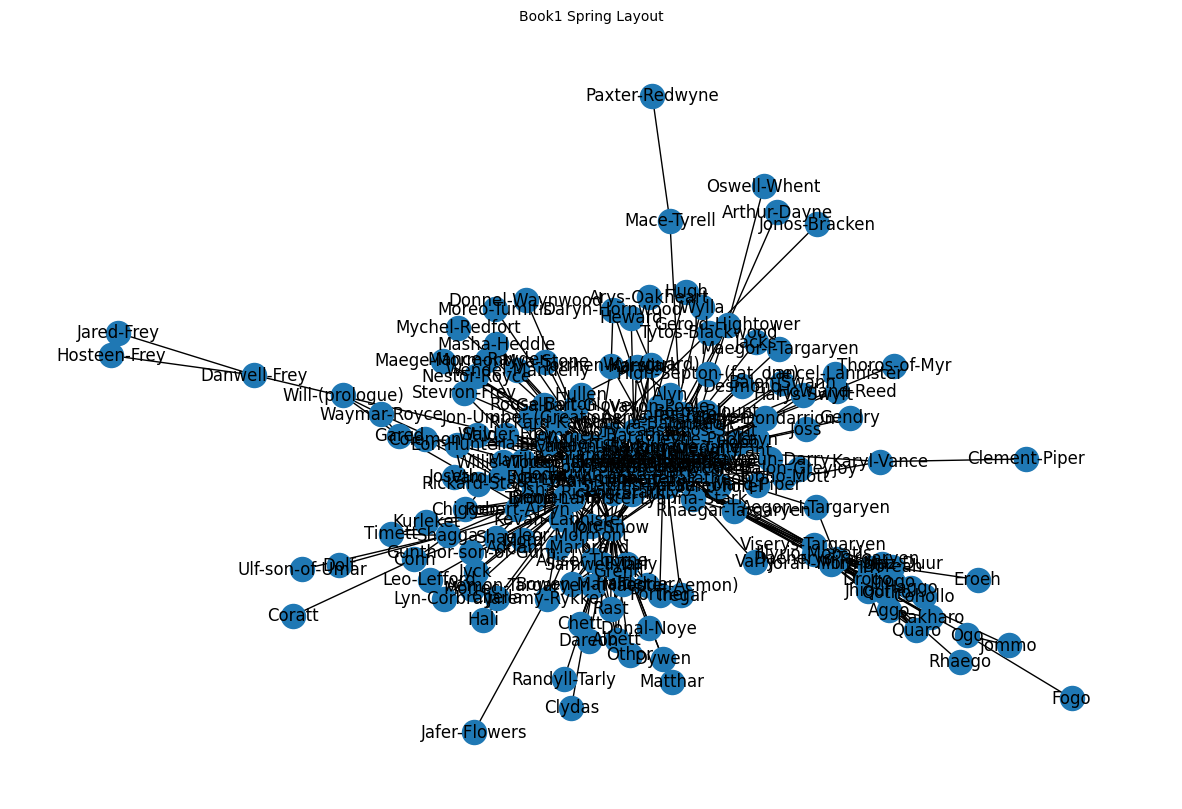

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spring Layout", fontsize=10)
## YOUR CODE STARTS HERE

pos = nx.spring_layout(book1_G)
nx.draw(book1_G, pos, with_labels=True, ax=ax)

## (b)

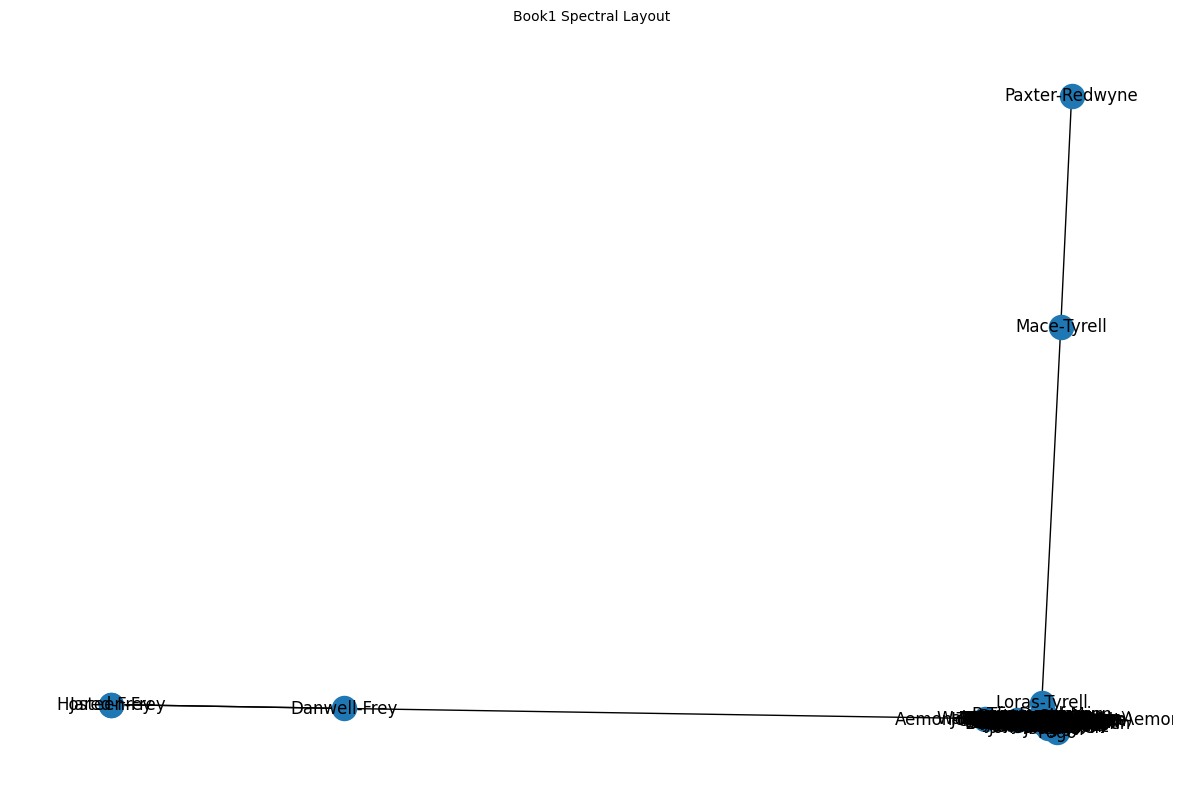

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Spectral Layout", fontsize=10)
## YOUR CODE STARTS HERE

pos = nx.spectral_layout(book1_G)
nx.draw(book1_G, pos, with_labels=True, ax=ax)

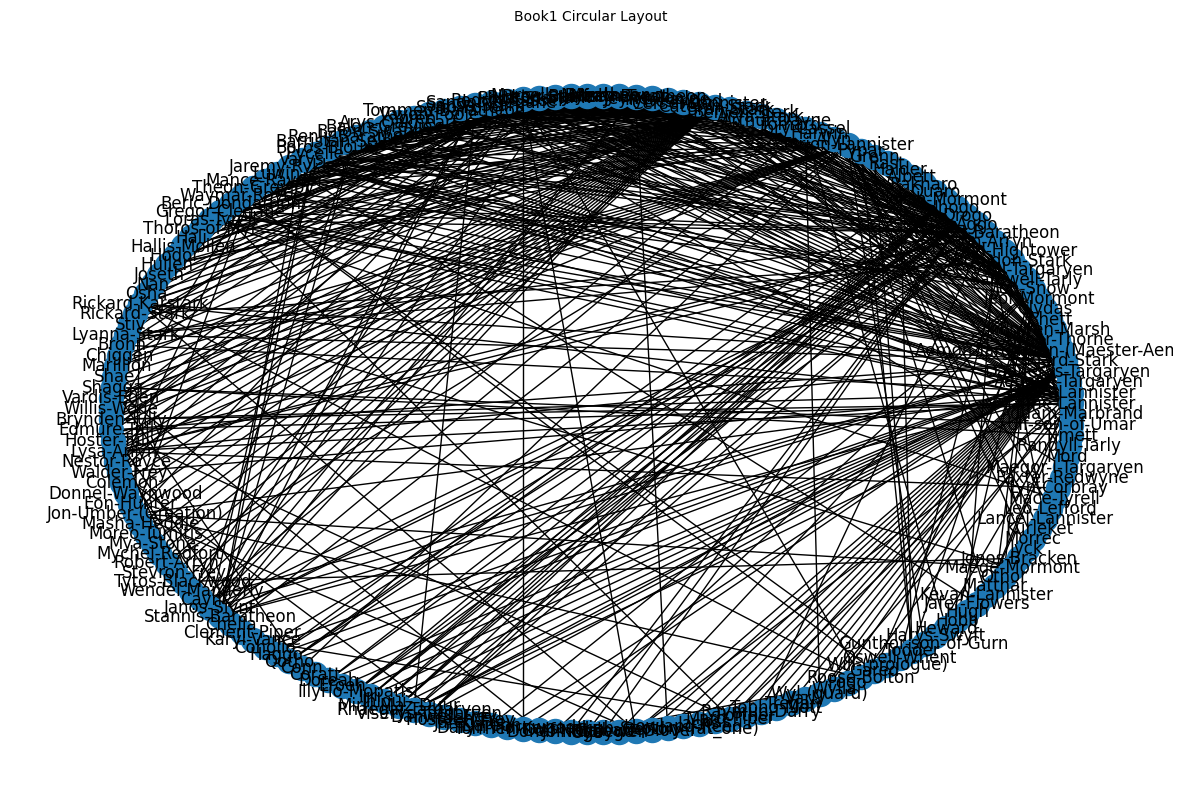

In [18]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Book1 Circular Layout", fontsize=10)
## YOUR CODE STARTS HERE

pos = nx.circular_layout(book1_G)
nx.draw(book1_G, pos, with_labels=True, ax=ax)

# Q3

## (a)

In [37]:
## YOUR CODE STARTS HERE
deg_centrality_allbook = nx.degree_centrality(allbook_G)
sorted_deg_centrality = sorted(deg_centrality_allbook.items(), key=itemgetter(1)
, reverse=True) #itemgetter to sort data w/ centrality vals; (1) to sort acc to
#val not the key
top_15_degree_centrality = sorted_deg_centrality[:15]
print("top 15 degree centrality:", top_15_degree_centrality)

top 15 degree centrality: [('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327), ('Cersei-Lannister', 0.1220125786163522), ('Stannis-Baratheon', 0.11194968553459118), ('Arya-Stark', 0.10566037735849056), ('Catelyn-Stark', 0.09433962264150943), ('Sansa-Stark', 0.09433962264150943), ('Robb-Stark', 0.0930817610062893), ('Eddard-Stark', 0.0930817610062893), ('Daenerys-Targaryen', 0.09182389937106918), ('Joffrey-Baratheon', 0.08679245283018867), ('Theon-Greyjoy', 0.0830188679245283), ('Robert-Baratheon', 0.08176100628930817), ('Bran-Stark', 0.06792452830188679)]


**Enter answer here:**

All 15 characters above are major characters as there aren't any significantly low degree centrality values for the characters.




## (b)

In [24]:
# PageRank
## YOUR CODE STARTS HERE
pagerank_allbook = nx.pagerank(allbook_G)
sorted_pagerank = sorted(pagerank_allbook.items(), key=itemgetter(1), reverse=True)
top_15_pagerank = sorted_pagerank[:15]
print("top 15 pagerank:", top_15_pagerank)

top 15 pagerank: [('Jon-Snow', 0.0356937645004584), ('Tyrion-Lannister', 0.03284906001585236), ('Cersei-Lannister', 0.023607038592018494), ('Daenerys-Targaryen', 0.02230688198724802), ('Jaime-Lannister', 0.019753549619362144), ('Eddard-Stark', 0.018938219584721857), ('Arya-Stark', 0.018538944931775433), ('Stannis-Baratheon', 0.01805167123106783), ('Joffrey-Baratheon', 0.01742008392061762), ('Robb-Stark', 0.017344651104667343), ('Bran-Stark', 0.016699569168749175), ('Sansa-Stark', 0.016291183713306845), ('Robert-Baratheon', 0.015677734148541216), ('Catelyn-Stark', 0.015210743688076967), ('Theon-Greyjoy', 0.013877294725902392)]


In [38]:
# Closeness Centrality,
## YOUR CODE STARTS HERE
closeness_centrality_allbook = nx.closeness_centrality(allbook_G)
sorted_closeness_centrality = sorted(closeness_centrality_allbook.items(),
                                     key=itemgetter(1), reverse=True)
top_15_closeness_centrality = sorted_closeness_centrality[:15]
print("top 15 closeness centrality:", top_15_closeness_centrality)

top 15 closeness centrality: [('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211), ('Cersei-Lannister', 0.45454545454545453), ('Jaime-Lannister', 0.4519613416714042), ('Jon-Snow', 0.44537815126050423), ('Stannis-Baratheon', 0.4446308724832215), ('Robb-Stark', 0.4441340782122905), ('Joffrey-Baratheon', 0.4339519650655022), ('Catelyn-Stark', 0.4334787350054526), ('Sansa-Stark', 0.43300653594771243), ('Arya-Stark', 0.43136190992946283), ('Theon-Greyjoy', 0.4233226837060703), ('Bran-Stark', 0.41886195995785036), ('Tywin-Lannister', 0.4112778065183652)]


In [39]:
# Betweenness Centrality
## YOUR CODE STARTS HERE
betweenness_centrality_allbook = nx.betweenness_centrality(allbook_G)
sorted_betweenness_centrality = sorted(betweenness_centrality_allbook.items(),
                                       key=itemgetter(1), reverse=True)
top_15_betweenness_centrality = sorted_betweenness_centrality[:15]
print("top 15 betweenness centrality:", top_15_betweenness_centrality)

top 15 betweenness centrality: [('Jon-Snow', 0.1921196196835449), ('Tyrion-Lannister', 0.1621910961115984), ('Daenerys-Targaryen', 0.11841801916269204), ('Theon-Greyjoy', 0.11128331813470228), ('Stannis-Baratheon', 0.11013955266679566), ('Jaime-Lannister', 0.10083800602581632), ('Cersei-Lannister', 0.08870426655860289), ('Arya-Stark', 0.08724236063571153), ('Eddard-Stark', 0.07873239257251873), ('Robert-Baratheon', 0.07822769060383258), ('Robb-Stark', 0.06646842683586629), ('Catelyn-Stark', 0.054973667953404186), ('Sansa-Stark', 0.04869098175180615), ('Barristan-Selmy', 0.045549578315223826), ('Bran-Stark', 0.04491117872765179)]


## (c)

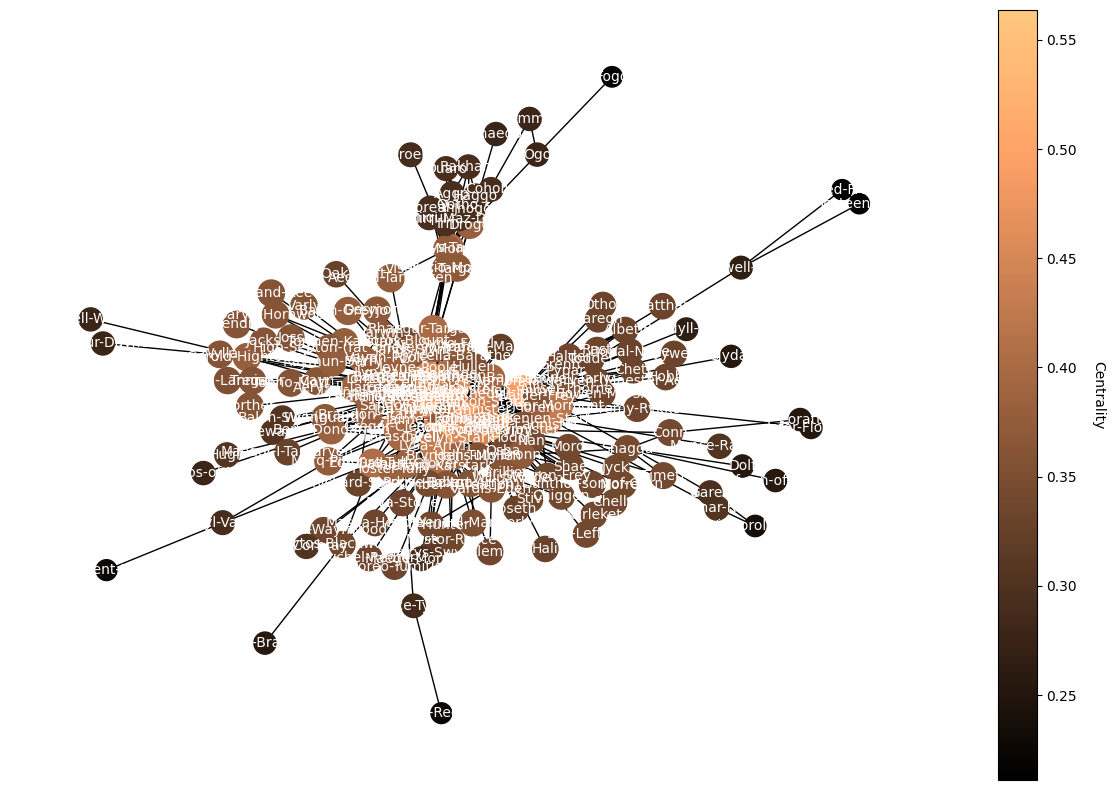

In [42]:
## YOUR CODE STARTS HERE

def draw_centrality(G: nx.Graph, centrality_measure: dict, node_scale: float):

    fig, ax = plt.subplots(figsize=(15, 10))

    #centrality, cast it to a np.array of floats
    centrality = np.array(list(centrality_measure.values()), dtype=float)

    #plot using spring layout with a fixed seed for consistent positioning
    pos = nx.spring_layout(G, seed=42)
    #map the centrality to a linear colorspace, scale node size by centrality
    nx.draw(G, pos, ax=ax, node_color=centrality, node_size=centrality*node_scale
            , cmap=plt.cm.copper)
    #draw node labels
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color="white")
    #place a colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.copper,
                               norm=plt.Normalize(vmin=min(centrality),
                                                  vmax=max(centrality)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Centrality', rotation=270, labelpad=20)
    plt.show()

#calc closeness centrality for book1_G
closeness_centrality = nx.closeness_centrality(book1_G)

#draw the graph using the draw_centrality function with closeness centrality and a node scale
draw_centrality(book1_G, closeness_centrality, node_scale=1e3)

# Q4

## (a)

In [43]:
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    print(f"Book{book_num+1}")
    ## YOUR CODE STARTS HERE

    #compute the betweenness centrality for the book graph
    betweenness = nx.betweenness_centrality(book_G)
    #sort the characters by betweenness and take the top 5
    top_5_by_betweenness = sorted(betweenness.items(), key=lambda item: item[1],
                                  reverse=True)[:5]
    #output the top 5 characters
    for character, score in top_5_by_betweenness:
        print(f"{character}: {score}")


Book1
Eddard-Stark: 0.2696038913836117
Robert-Baratheon: 0.21403028397371796
Tyrion-Lannister: 0.1902124972697492
Jon-Snow: 0.17158135899829566
Catelyn-Stark: 0.1513952715347627
Book2
Arya-Stark: 0.1881116846731781
Jon-Snow: 0.17443976935054054
Robb-Stark: 0.1649406213117506
Tyrion-Lannister: 0.15532375650368552
Robert-Baratheon: 0.15374366220396257
Book3
Jon-Snow: 0.2238286056882584
Robert-Baratheon: 0.1664354010358413
Robb-Stark: 0.16232085177685468
Tyrion-Lannister: 0.15409096601718392
Joffrey-Baratheon: 0.14189087122742164
Book4
Stannis-Baratheon: 0.2763060074924735
Cersei-Lannister: 0.2754801247893542
Jaime-Lannister: 0.24281879137413512
Balon-Greyjoy: 0.19059739280327515
Sansa-Stark: 0.1527539849794001
Book5
Stannis-Baratheon: 0.45283060689247934
Daenerys-Targaryen: 0.2959459062106149
Jon-Snow: 0.24484873673158666
Tyrion-Lannister: 0.20961613179551256
Robert-Baratheon: 0.17716906651536968


## (b)

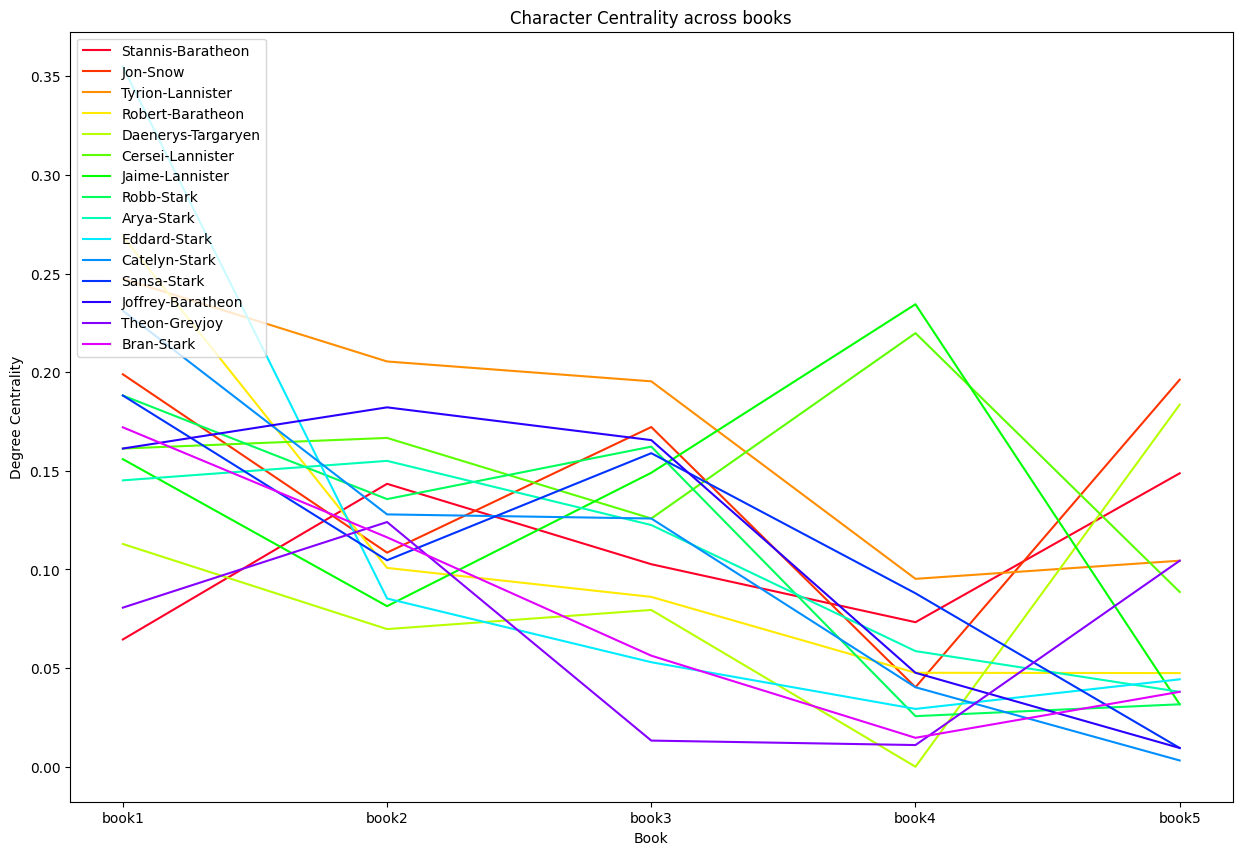

In [44]:
## YOUR CODE STARTS HERE

#collecting top characters by betweenness centrality from each book
top_characters = set()
for book_G in [book1_G, book2_G, book3_G, book4_G, book5_G]:
    betweenness = nx.betweenness_centrality(book_G)
    #sort and get the top characters from this book
    top_characters |= set(dict(sorted(betweenness.items(), key=lambda item:
                                      item[1], reverse=True)[:15]).keys())

#`top_characters` contains more than 15 characters, so we should take those with the highest
#cumulative betweenness centrality score across all books
cumulative_betweenness = {character: 0 for character in top_characters}
for book_G in [book1_G, book2_G, book3_G, book4_G, book5_G]:
    betweenness = nx.betweenness_centrality(book_G)
    for character in top_characters:
        cumulative_betweenness[character] += betweenness.get(character, 0)

#top 15 characters by cumulative betweenness centrality
candidates = [character for character, centrality in
              sorted(cumulative_betweenness.items(), key=lambda item: item[1],
                     reverse=True)[:15]]

## YOU MAY USE THIS PART or IMPLEMENT YOUR OWN
deg_centrality_books = np.zeros((15,5))
for book_num, book_G in enumerate([book1_G, book2_G, book3_G, book4_G, book5_G]):
    deg_centrality = nx.degree_centrality(book_G)
    for i, candidate in enumerate(candidates):
        #return 0 if candidate is not in the book
        deg_centrality_books[i][book_num] = deg_centrality.get(candidate, 0.0)




fig, ax = plt.subplots(figsize=(15, 10))
books_axis = [f'book{i+1}' for i in range(5)]

# If use default cm the colors start to rotate after 8 categories
NUM_COLORS = 15
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for i,candidate in enumerate(candidates):
    plt.plot(books_axis, deg_centrality_books[i], label=candidate)

plt.xlabel("Book")
plt.ylabel("Degree Centrality")
plt.legend(loc='upper left')
plt.title('Character Centrality across books')
plt.show()


**Enter answer here:**
Character with escalating importance is Robb-Stark (dark green) and the character with diminishing significance is Jon-Snow (lighter red line)
